<a href="https://colab.research.google.com/github/brunompasini/Titanic/blob/master/titanic_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Notebook by Bruno Pasini

github.com/brunompasini

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Data

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## How the data looks like

#### Some Definitions
Survived: 0 = No; 1 = Yes  
SibSp: Number of siblings and spouses aboard  
ParCh: Number of parents and children aboard  
Embarked: C = Cherbourg; Q = Queenstown; S = Southampton  

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#print(train.info())
#print("-"*20 +"//"+"-"*20)
#print(test.info())

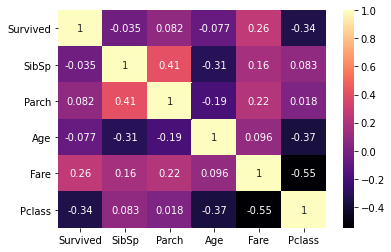

In [ ]:
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare","Pclass","Sex"]].corr(), cmap = "magma", annot=True)

##### Null values

In [ ]:
print(train.isnull().sum())
print("-"*20 +"//"+"-"*20)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------//--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
data = [train, test]

In [ ]:
male_female = {'male':0, 'female':1}
embark = {'C':0, 'Q':1, 'S':2}
for el in data:
    el['Age'].fillna(el['Age'].median(), inplace=True)
    el['Fare'].fillna(el['Fare'].median(), inplace=True)
    el['Embarked'].fillna(el['Embarked'].mode()[0], inplace=True)
    el.drop(['Cabin', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
    el['Sex'] = el['Sex'].map(male_female)
    el['Embarked'] = el['Embarked'].map(embark)

In [ ]:
# Droping Cabin and Ticket, both non-numerical values since Fare and Class covers the Economic Status
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,2
1,2,1,1,1,38.0,71.2833,0
2,3,1,3,1,26.0,7.9250,2
3,4,1,1,1,35.0,53.1000,2
4,5,0,3,0,35.0,8.0500,2


### Using SKLearn

to be continued

In [ ]:
x_train = train.drop("Survived",axis=1)
y_train = train["Survived"]
x_test  = test.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
logis = LogisticRegression()
logis.fit(x_train, y_train)
y_pred = logis.predict(x_test)

logis.score(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7912457912457912

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

svc.score(x_train, y_train)

# 0.63157 score on kaggle

0.6632996632996633

In [ ]:
gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred = gauss.predict(x_test)

gauss.score(x_train, y_train)

# 0.73684 score on kaggle

0.7856341189674523

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

rf.score(x_train,y_train)

# 0.76076 score on kaggle

1.0

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic_submission.csv', index=False)

### Using a NN to predict

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, RMSprop

#### Creating callbacks

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epock,logs={}):
    if (logs.get('accuracy')>0.8):
      print("\nAccuracy is over 80%")
      self.model.stop_training = True

callbacks = myCallback()

#### NN

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,2
1,2,1,1,1,38.0,71.2833,0
2,3,1,3,1,26.0,7.9250,2
3,4,1,1,1,35.0,53.1000,2
4,5,0,3,0,35.0,8.0500,2


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(6,)),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              28672     
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

In [ ]:
history = model.fit(train.drop('Survived',axis=1), train["Survived"], epochs=100, batch_size=10, verbose=1, callbacks=[callbacks])

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
testID = test["PassengerId"]
predict = model.predict(test)
print(predict)
predictions = [0 if el < 0.5 else 1 for el in predict]
result = pd.DataFrame({'PassengerId': testID, 'Survived': predictions})
result.to_csv('titanic_submission.csv', index=False)

In [ ]:
# Got a 0.73923 score on Kaggle